# Chapter 14. Stan

* 베이지안 통계 R
* Doing Bayesian Data Analysis, Second Edition: A Tutorial with R, JAGS, and Stan
* 김무성

# Contents

* 14.1 HMC sampling
* 14.2 Installing Stan
* 14.3 A complete example
* 14.4 Specify model top-down in Stan
* 14.5 Limitations and extras

# 14.1 HMC sampling

<img src="https://theclevermachine.files.wordpress.com/2012/11/mhgaussiansamples1.png" />

<img src="https://theclevermachine.files.wordpress.com/2012/11/hmcgaussiansamples.png" />

<img src="figures/fig14.1.png" width=600 /> 

<img src="figures/eq14.1.png" width=600 />    

<img src="figures/fig14.2.png" width=600 />  

<img src="figures/fig14.3.png" width=600 />  

# 14.2 Installing Stan

* http://mc-stan.org/
* RStan
    - https://github.com/stan-dev/rstan
        - https://github.com/stan-dev/rstan/wiki/RStan-Getting-Started
        - RStan Mac OS X Prerequisite - https://github.com/stan-dev/rstan/wiki/RStan-Mac-OS-X-Prerequisite-Installation-Instructions

# 14.3 A complete example

* 14.3.1. Resusing the compiled model
* 14.3.2. General structure of Stan model specification
* 14.3.3. Think log probability to think like Stan
* 14.3.4. Sampling the prior in Stan
* 14.3.5. Simlified scripts for frequently used analyses

#### 변수 선언

In [ ]:
int<lower=0> N  // N은 lower bound가 0인, integer 형 변수라는 의미. 

#### 모델 설정

In [ ]:
modelString = "
    data {
        int<lower=0> N ;
        int y[N] ; // y is a length-N vector of itegers
    }
    parameters {
        real<lower=0, uppper=1> theata ;
    }
    model {
        theta ~ beta(1, 1) ;
        y ~ bernoulli(theta) ;
    }
" # close quote for modelString    

#### 확률변수의 벡터 표현

##### Stan의 경우

In [ ]:
y ~ bernoulli(theta) ;

##### JAGS의 경우

In [ ]:
for ( i in 1:N ) {
    y[i] ~ dbern(theta)
}

#### RStan에서 모델 loading

In [ ]:
library(rstan)
# translate the model into C++ code 
# and compile the C++ code into an executable dynamic shared object(DSO) 
stanDso = stan_model(model_code=modelSTring) 

#### Sampllng 

In [ ]:
# Create some fictitious data :
N = 50; z = 10; y = c(rep(1,z), rep(0,N-z))
dataList = list(y=y, N=N)

stanFit = sampling(object=stanDso, data=dataList,
                            chains=3, iter=1000, warmup=200, thin=1)

#### Convert stan format to coda format :

In [ ]:
# Load rjags, coda, and DBDA2E functions :
source("DBDAE-utlities.R")
# Convert stan format to coda format :
mcmcCoda = mcmc.list(lapply(1:ncol(stanFit), 
                                            function(x) { mcmc(as.array(stanFit)[,x,]) } ) )
# Graph chin diagnostics using DBDA2E function :
diagMCMC( mcmcCoda, parName=c("theta"))

<img src="figures/fig8.3.png" width=600 />

## 14.3.1. Resusing the compiled model

* 한번 컴파일된 모델은, 변경없이 데이터만 바꿔서 계속 쓸 수 있다.

## 14.3.2. General structure of Stan model specification

In [ ]:
data {
    ... declarations ...
}
transforemd data {
    ... declarations ... statements ...
}
parameters {
    ... declarations ... 
}
transforemd parameters {
    ... declarations ... statements ...
}
model {
    ... declarations ... statements ...
}
generated quantities {
    ... declarations ... statements ...
}

## 14.3.3. Think log probability to think like Stan

In [ ]:
y ~ normal(mu, sigma)

* 위의 코드와 아래 코드와 같다(사실 위의 코드를 Stan에서는 아래 형식으로 바꾼다)

In [ ]:
increment_log_prob(normal_log(y, mu, sigma))

* Stan의 아키텍쳐에서 log-probability와 gradients가 핵심이다(Hamiltonian dynmics 때문에)

## 14.3.4. Sampling the prior in Stan

* JAGS와는 다르게, liklihood를 주석처리하면 된다.

In [ ]:
modelString = "
    data {
        int<lower=0> N ;
        int y[N] ; // y is a length-N vector of itegers
    }
    parameters {
        real<lower=0, uppper=1> theata ;
    }
    model {
        theta ~ beta(1, 1) ;
//        y ~ bernoulli(theta) ;
    }
" # close quote for modelString  

## 14.3.5. Simlified scripts for frequently used analyses

In [1]:
# 책에는 없는 코드. 실습을 위해 data 폴더에 넣은 코드를 실행시키기 위한 작업
cur_dir = getwd()
setwd(sprintf("%s/%s", cur_dir, 'data'))

In [2]:
# Example for Stan-Ydich-Xnom1subj-MbernBeta.R 
#------------------------------------------------------------------------------- 
# Optional generic preliminaries:
#graphics.off() # This closes all of R's graphics windows.
#rm(list=ls())  # Careful! This clears all of R's memory!

In [3]:
#------------------------------------------------------------------------------- 
# Load The data 
myData = read.csv("z15N50.csv")

In [4]:
myData

,y
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0


<img src="figures/fig8.2.png" width=600 />

In [7]:
#------------------------------------------------------------------------------- 
# Load the functions genMCMC, smryMCMC, and plotMCMC:
source("Stan-Ydich-Xnom1subj-MbernBeta.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



In [23]:
#------------------------------------------------------------------------------- 
# Optional: Specify filename root and graphical format for saving output.
# Otherwise specify as NULL or leave saveName and saveType arguments 
# out of function calls.
fileNameRoot = "Stan-Ydich-Xnom1subj-MbernBeta-" 
graphFileType = "png" #"eps" 

In [10]:
#------------------------------------------------------------------------------- 
# Generate the MCMC chain:
mcmcCoda = genMCMC( data=myData , numSavedSteps=10000 , saveName=fileNameRoot )


TRANSLATING MODEL 'modelString' FROM Stan CODE TO C++ CODE NOW.
COMPILING THE C++ CODE FOR MODEL 'modelString' NOW.
In file included from file33140a60ec6.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/model/model_header.hpp:17:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/agrad/rev.hpp:5:
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/agrad/rev/chainable.hpp:87:17: warning: 'static' function 'set_zero_all_adjoints' declared in header file should be declared 'static inline' [-Wunneeded-internal-declaration]
    static void set_zero_all_adjoints() {
                ^
In file included from file33140a60ec6.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/model/model_header.hpp:21:
/Library/Frameworks/R.framework/Versions/3.2/Resources/li

In [24]:
#------------------------------------------------------------------------------- 
# Display diagnostics of chain, for specified parameters:
parameterNames = varnames(mcmcCoda) # get all parameter names
for ( parName in parameterNames ) {
  diagMCMC( mcmcCoda , parName=parName , 
                saveName=fileNameRoot , saveType=graphFileType )
}

In [25]:
# 창으로 뜨는 것들을 없앤다.
graphics.off()

<img src="data/Stan-Ydich-Xnom1subj-MbernBeta-Diagtheta.png" width=600 />
<img src="data/Stan-Ydich-Xnom1subj-MbernBeta-Diaglp__.png" width=600 />

In [26]:
#------------------------------------------------------------------------------- 
# Get summary statistics of chain:
summaryInfo = smryMCMC( mcmcCoda , compVal=0.5 , rope=c(0.45,0.55) ,
                        saveName=fileNameRoot )
# Display posterior information:
plotMCMC( mcmcCoda , data=myData , # compVal=0.5 , rope=c(0.45,0.55) ,
          saveName=fileNameRoot , saveType=graphFileType )

           Mean    Median      Mode    ESS HDImass    HDIlow   HDIhigh CompVal
theta 0.3078927 0.3053939 0.3109765 8995.5    0.95 0.1830674 0.4277429     0.5
      PcntGtCompVal ROPElow ROPEhigh PcntLtROPE PcntInROPE PcntGtROPE
theta          0.19    0.45     0.55      98.35       1.64       0.01


In [27]:
graphics.off()

<img src="data/Stan-Ydich-Xnom1subj-MbernBeta-Post.png" width=600 />

Inference for Stan model: modelString.
4 chains, each with iter=10500; warmup=500; thin=4; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta   0.31    0.00 0.06   0.19   0.27   0.31   0.35   0.44  9014    1
lp__  -32.59    0.01 0.71 -34.64 -32.73 -32.31 -32.14 -32.10  8875    1

Samples were drawn using NUTS(diag_e) at Wed Jul  8 18:40:05 2015.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


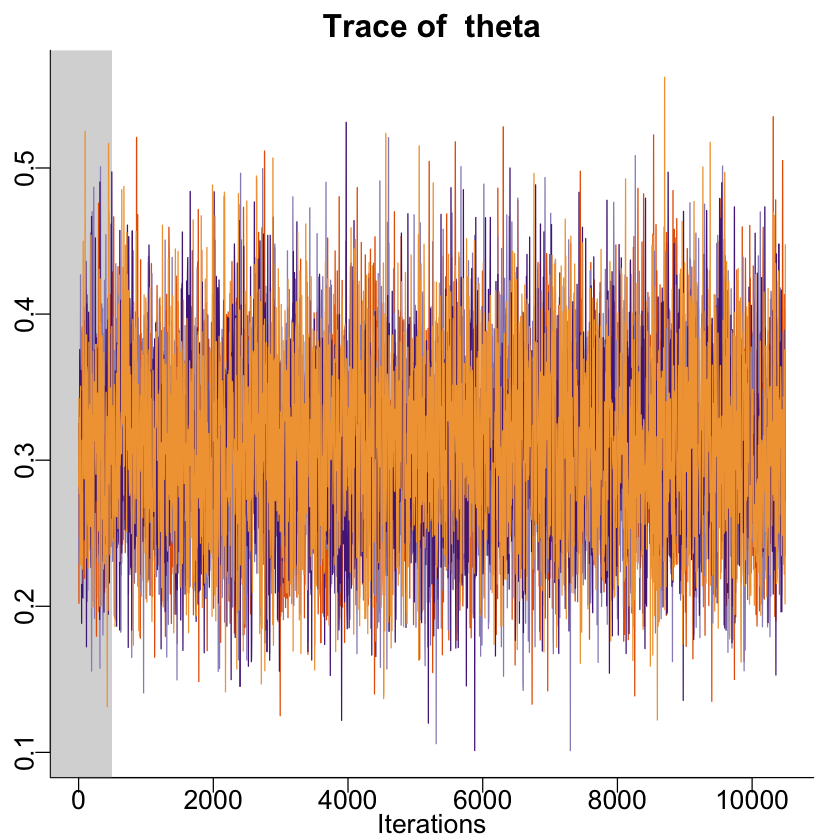

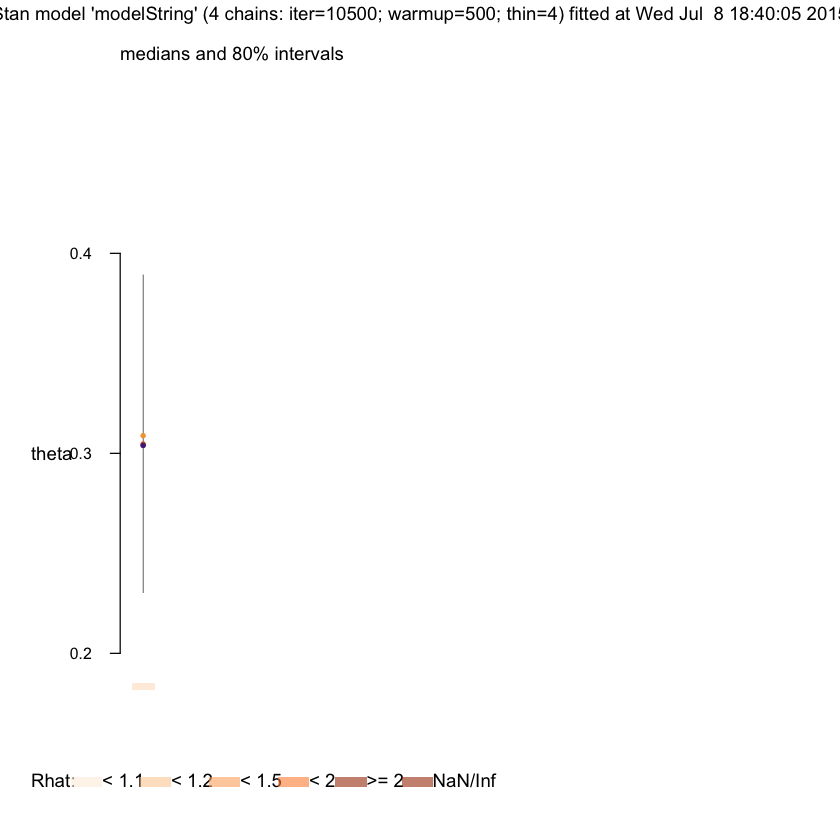

In [29]:
#------------------------------------------------------------------------------- 
# Use Stan display functions instead of DBDA2E functions:
# Load the stanFit object that was saved by genMCMC:
load("Stan-Ydich-Xnom1subj-MbernBeta-StanFit.Rdata")
# Display information:
show(stanFit)
openGraph()
traceplot(stanFit,pars=c("theta"))
openGraph()
plot(stanFit,pars=c("theta"))

In [30]:
graphics.off()

# 14.4 Specify model top-down in Stan

* In Stan, model specifications usually begin with the top level of the prior, and then lower-level dependencies are filled in, finishing with the likelihood of the data

# 14.5 Limitations and extras

* One of the main limitations of Stan is that is does not allow discrete (i.e., categorical) parameters. (Stan <= 2.0)

# 참고자료

* [1] Doing Bayesian Data Analysis, Second Edition: A Tutorial with R, JAGS, and Stan - http://www.amazon.com/Doing-Bayesian-Analysis-Second-Edition/dp/0124058884
* [2] http://mc-stan.org/